In [1]:
%cd ../..
!pwd

/workspaces/freq-net
/workspaces/freq-net


In [2]:
from freq_net.data_loader.data_loaders import DIV2KDataset, DIV2KDataLoader

/opt/conda/lib/python3.10/site-packages/torchvision/io/image.py:13: UserWarning: Failed to load image Python extension: '/opt/conda/lib/python3.10/site-packages/torchvision/image.so: undefined symbol: _ZN5torch3jit17parseSchemaOrNameERKSs'If you don't plan on using image functionality from `torchvision.io`, you can ignore this warning. Otherwise, there might be something wrong with your environment. Did you have `libjpeg` or `libpng` installed before building `torchvision` from source?
  warn(


In [3]:
import numpy as np
import matplotlib.pyplot as plt

## Check dataset

In [4]:
ds = DIV2KDataset()
dl = DIV2KDataLoader(1, num_workers=0, shuffle=False)
print(next(iter(ds))[0])
print(next(iter(dl))[0][0].shape)
print(next(iter(dl))[0][1].shape)
print(next(iter(dl))[0][2].shape)

<PIL.PngImagePlugin.PngImageFile image mode=RGB size=510x351 at 0x7F581ED56710>
torch.Size([1, 3, 512, 512])
torch.Size([1, 3, 512, 512])
torch.Size([1, 16, 16, 32, 32])


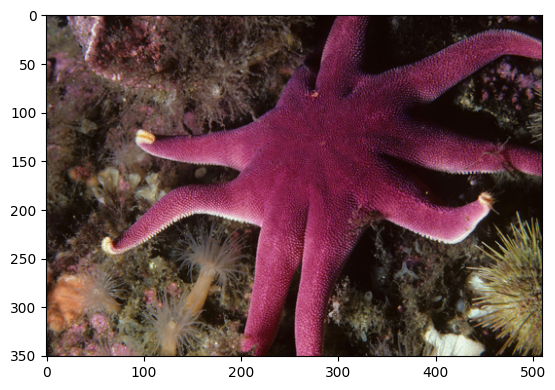

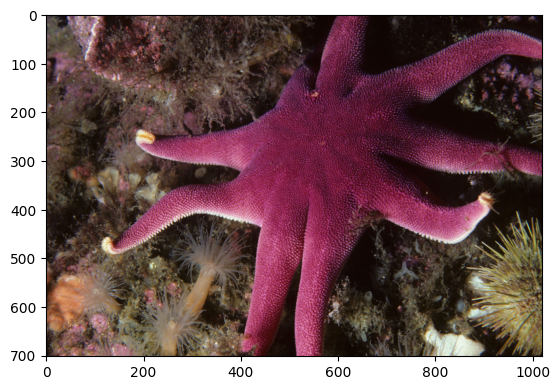

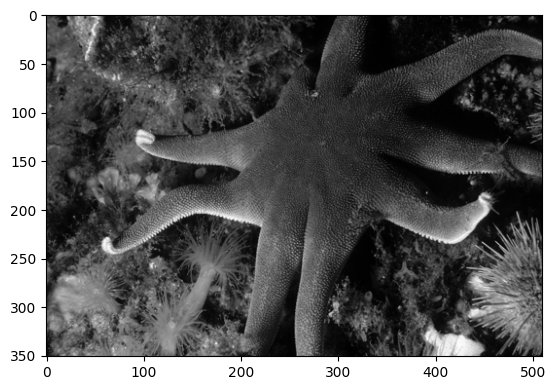

In [5]:
d = next(iter(ds))
plt.imshow(d[0], cmap='gray')
plt.show()
plt.imshow(d[1], cmap='gray')
plt.show()
plt.imshow(np.array(d[0].convert('YCbCr'))[:,:,0], cmap='gray')
plt.show()

## Check dataloader

In [6]:
it = iter(dl)
d = next(it)

### RGB

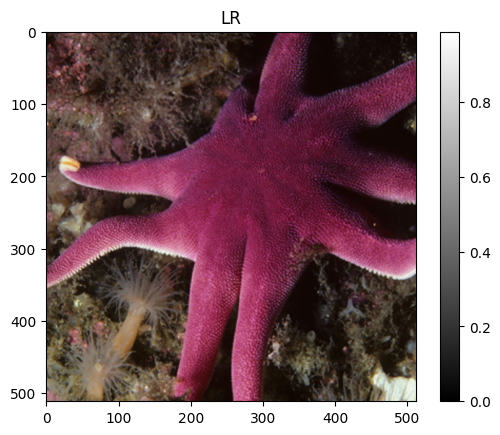

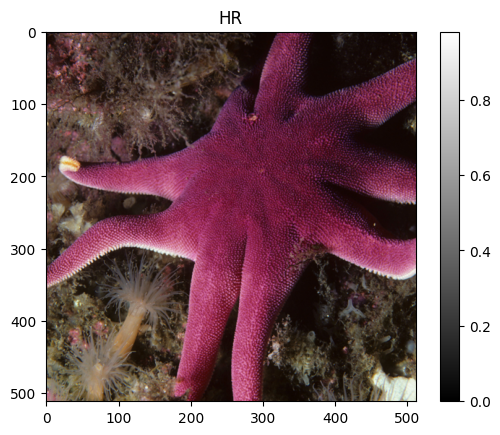

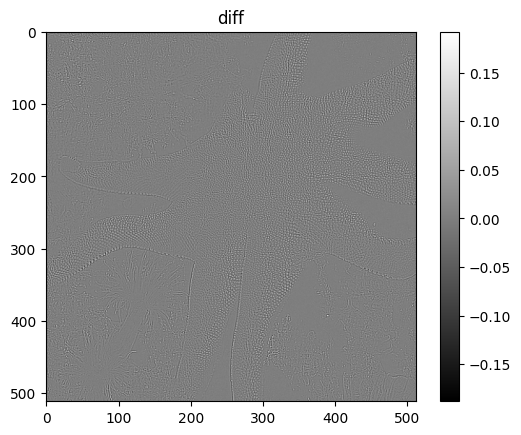

In [10]:
plt.title('LR')
plt.imshow(d[0][0][0].movedim(0, 2), cmap='gray')
plt.colorbar()
plt.show()

plt.title('HR')
plt.imshow(d[1][0][0].movedim(0, 2), cmap='gray')
plt.colorbar()
plt.show()

plt.title('diff')
plt.imshow((d[1][0][0][0] - d[0][0][0][0]), cmap='gray')
plt.colorbar()
plt.show()

### Y in YCrCb

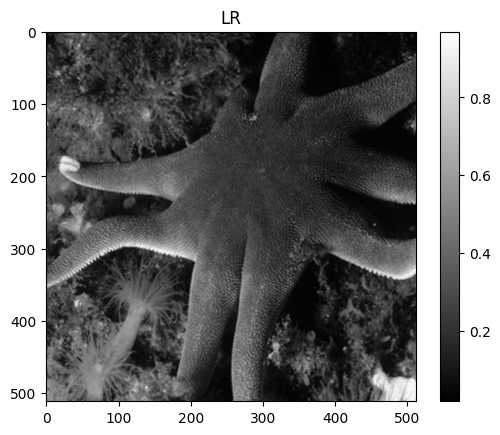

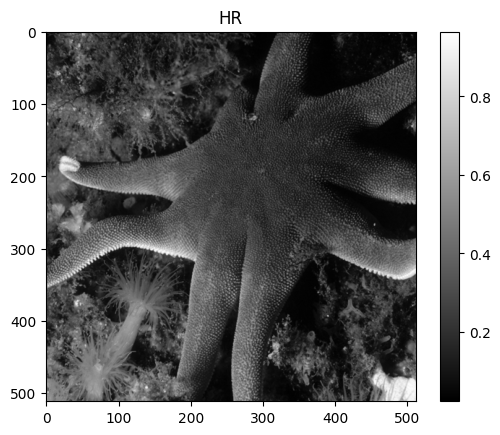

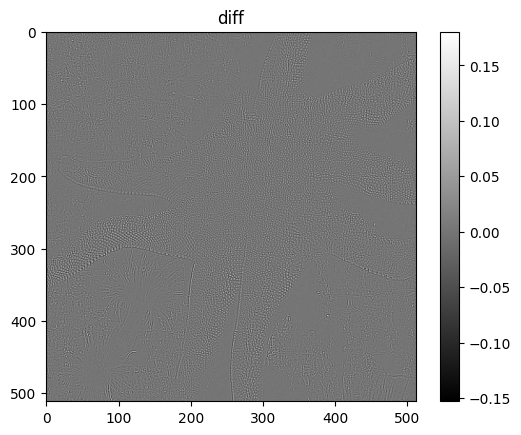

In [11]:
plt.title('LR')
plt.imshow(d[0][1][0][0], cmap='gray')
plt.colorbar()
plt.show()

plt.title('HR')
plt.imshow(d[1][1][0][0], cmap='gray')
plt.colorbar()
plt.show()

plt.title('diff')
plt.imshow(d[1][1][0][0] - d[0][1][0][0], cmap='gray')
plt.colorbar()
plt.show()

## Check dataloader DCT

In [12]:
d[0][2].shape

torch.Size([1, 16, 16, 32, 32])

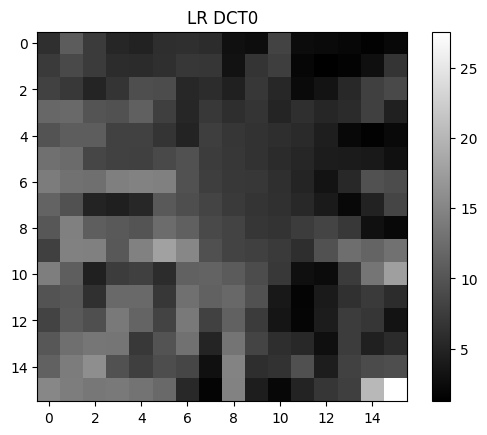

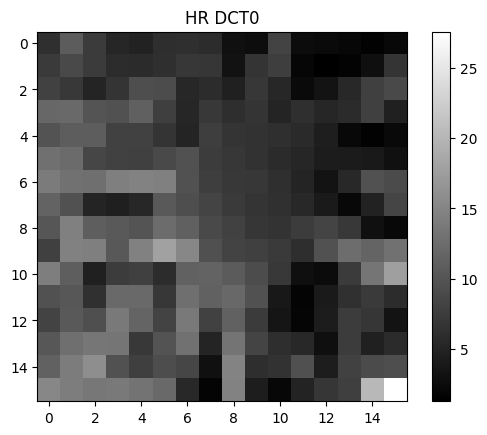

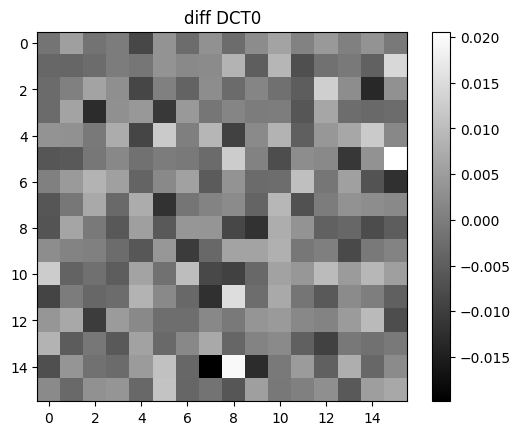

In [14]:
plt.title('LR DCT0')
plt.imshow(d[0][2][0, :, :, 0, 0], cmap='gray')
plt.colorbar()
plt.show()

plt.title('HR DCT0')
plt.imshow(d[1][2][0, :, :, 0, 0], cmap='gray')
plt.colorbar()
plt.show()

plt.title('diff DCT0')
plt.imshow(d[1][2][0, :, :, 0, 0] - d[0][2][0, :, :, 0, 0], cmap='gray')
plt.colorbar()
plt.show()